# Create ER Diagrams with OO Python
- Install graphviz from https://graphviz.org/download/
- Install the Python graphviz package with `pip install graphviz`

In [1]:
from PyErGraphing.PyErGraphing import *

## Define Entities and Attributes
### Attribute Class
```python
Attribute(name: str, type: str = PRIMITIVE, composite_attrs: list[Element] = None, pk: bool = False)
```
- Options for Attribute type are:
    - `PRIMITIVE` which creates a plain oval node
    - `COMPOSITE` which creates an oval node off of the parent attribute node
    - `MULTIVALUED` which creates a double oval node
    - `DERIVED` which creates a dashed oval node
- Composite Attributes can be added to an attribute by passing a list of `Attribute` objects to the `composite_attrs` parameter
    - See person_attrs below for an example
- Attributes can be marked as primary keys by setting the `pk` parameter to `True`, this will underline the name of the attribute in the diagram
### Entity Class
```python
Entity(name: str, attributes: list[Attribute], weak: bool = False)
```
- Add Attributes to an Entity by passing a list of `Attribute` objects to the `attributes` parameter
- Entities can be marked as weak by setting the `weak` parameter to `True`, this will draw the entity with a double border

In [2]:
product_attrs = [
    Attribute("pName", PRIMITIVE, pk=True),
    Attribute("pNumber", PRIMITIVE),
]
product = Entity("Product", product_attrs)

supplier_attrs = [
    Attribute("sName", PRIMITIVE, pk=True),
    Attribute("sLoc", PRIMITIVE),
]
supplier = Entity("Supplier", supplier_attrs)

consumer_attrs = [
    Attribute("cName", PRIMITIVE, pk=True),
    Attribute("cLoc", PRIMITIVE),
]
consumer = Entity("Consumer", consumer_attrs)

contract_attrs = [
    Attribute("price", PRIMITIVE),
    Attribute("quantity", PRIMITIVE),
]
contract = Entity("Contract", contract_attrs)

person_attrs = [
    Attribute("name", PRIMITIVE, pk=True),
    Attribute("DoB", COMPOSITE, [
        Attribute("day", PRIMITIVE),
        Attribute("month", PRIMITIVE),
        Attribute("year", PRIMITIVE),
    ]),
    Attribute("age", DERIVED),
    Attribute("Phone", MULTIVALUED)
]
person = Entity("Person", person_attrs)

## Define Relationships
### Relationship Class
```python
Relationship(name: str, entities: list[Entity], arrows: list[str], attributes: list[Attribute] = None, type: str = "default", weak: bool = False)
```
- Add Entities to a Relationship by passing a list of `Entity` objects to the `entities` parameter
- Define what types of arrows go between the Entity and Relationship by passing a list of strings to the `arrows` parameter
    - Options for arrows are:
        - `MANY_TO_MANY` which creates a line with no arrowhead
        - `ONE_TO_MANY` which creates a line with a solid arrowhead
        - `ONE_TO_ONE` which creates a line with an open arrowhead
    - The arrow list should be interpreted as Relationship ARROW_TYPE Entity for each ARROW_TYPE in the list
- Add Attributes to a Relationship by passing a list of `Attribute` objects to the `attributes` parameter
- The `type` parameter can be set to `ISA`
- Relationships can be marked as weak by setting the `weak` parameter to `True`, this will draw the relationship with a double border

In [3]:
consumerIsAPerson = Relationship("IsA", [consumer, person], arrows=[MANY_TO_MANY, MANY_TO_MANY], type="ISA")

supplies = Relationship("supplies", [supplier, contract], arrows=[ONE_TO_ONE, MANY_TO_MANY])
product_in = Relationship("in", [product, contract], arrows=[ONE_TO_ONE, MANY_TO_MANY])
consumes = Relationship("consumes", [consumer, contract], arrows=[ONE_TO_ONE, MANY_TO_MANY])

## Define an ER Diagram
### ER Diagram Class

In [4]:
er_diagram = ERDiagram(
    "Supply Chain",
    # All entities
    [
        product, 
        supplier, 
        consumer, 
        contract, 
        person
    ], 
    # All relationships
    [
        supplies, 
        product_in, 
        consumes,
        consumerIsAPerson
    ])

## Draw the Diagram

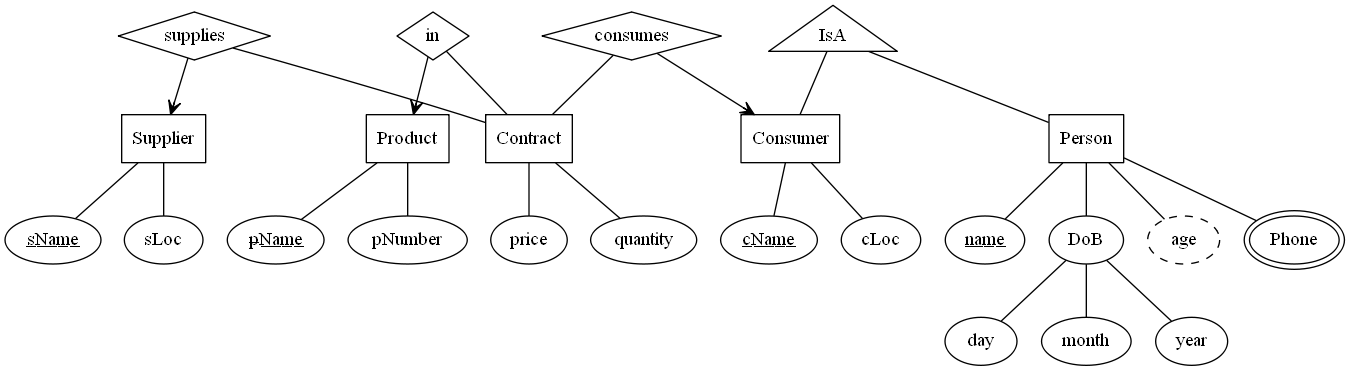

In [5]:
er_diagram.draw()